In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import style
style.use("fivethirtyeight")

In [3]:
dataset=pd.read_csv("IRIS.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
dataset["speciesID"]=encoding.fit_transform(dataset["species"])

In [7]:
newdata=dataset[dataset["species"]!="Iris-virginica"]
newdata.head()

,sepal_length,sepal_width,petal_length,petal_width,species,speciesID
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
x=newdata.drop(["sepal_length","sepal_width","species","speciesID"],axis=1)
y=newdata["speciesID"]

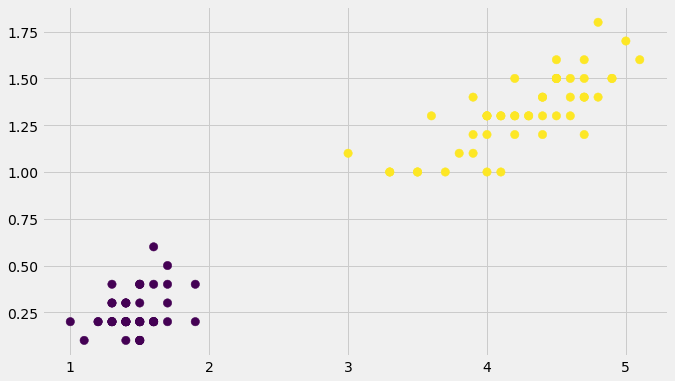

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(x["petal_length"],x["petal_width"],c=y,s=70)

In [11]:
from sklearn.svm import SVC

In [12]:
model=SVC(kernel="linear",C=1)
model.fit(x,y)

SVC(C=1, kernel='linear')

In [13]:
sp=model.support_vectors_
sp

array([[1.9, 0.4],
       [3. , 1.1]])

In [15]:
def svm(c):
    model=SVC(kernel="linear",C=c)
    model.fit(x,y)
    ax=plt.gca()
    plt.scatter(x["petal_length"],x["petal_width"],c=y,s=50)
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    xx=np.linspace(xlim[0],xlim[1],30)
    yy=np.linspace(ylim[0],ylim[1],30)
    XX,YY=np.meshgrid(xx,yy)
    xy=np.vstack([XX.ravel(), YY.ravel()]).T
    Z=model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
    plt.scatter(sp[:,0],sp[:,1],s=100,facecolors=None,edgecolors="k",linewidth=1)
    plt.show()

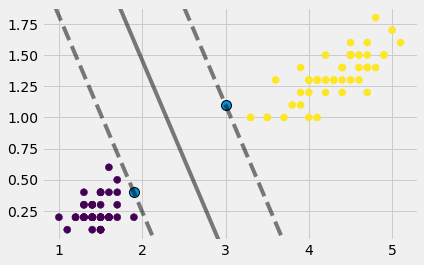

In [16]:
svm(10)

In [17]:
x=np.array(dataset[["sepal_length","petal_length"]])
y=np.array(dataset["speciesID"])

In [19]:
def svm(kernel,c,gamma,d):
    model1=SVC(kernel=kernel,C=c,gamma=gamma,degree=d)
    model1.fit(x,y)
    sp=model1.support_vectors_
    x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
    y_min,y_max=x[:,1].min()-1.5,x[:,1].max()+1
    height=(x_max/x_min)/100
    xx,yy=np.meshgrid(np.arange(x_min,x_max,height),np.arange(y_min,y_max,height))
    z=model1.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    plt.figure(figsize=(10,6))
    plt.contourf(xx,yy,z,cmap=plt.cm.Paired,alpha=0.5)
    plt.scatter(x[:,0],x[:,1],cmap=plt.cm.Paired,c=y)
    plt.xlim(xx.min(),xx.max())
    plt.xlabel("sepal length")
    plt.ylabel("petal length")
    plt.title(f"kernel is {kernel} with c={c},gamma={gamma},degree={d} ")
    plt.show()

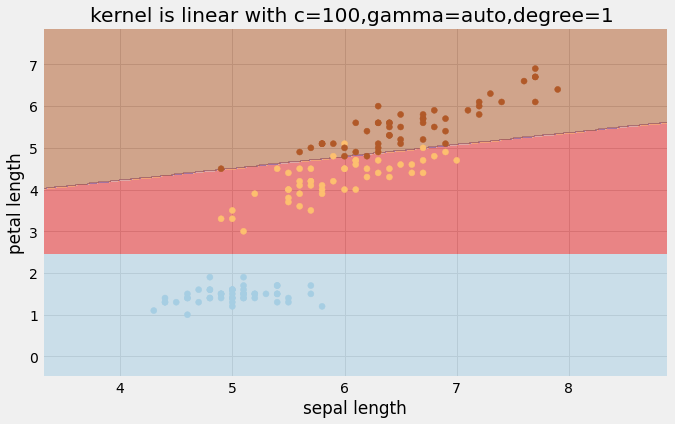

In [20]:
svm('linear',100,'auto',1)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [24]:
newdata.head()

,sepal_length,sepal_width,petal_length,petal_width,species,speciesID
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [45]:
x=dataset.drop(["species","speciesID"],axis=1)
y=dataset["speciesID"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6)

In [46]:
svm_model=SVC()
svm_model.fit(x_train,y_train)

SVC()

In [47]:
y_pred=svm_model.predict(x_test)

In [48]:
print("SVM Classifier")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy is : ",accuracy_score(y_test,y_pred))
print("cross validation accuracy ",end=" ")
print(cross_val_score(svm_model,x_train,y_train,cv=13).mean())

SVM Classifier
[[12  0  0]
 [ 0 12  0]
 [ 0  2 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

Accuracy is :  0.9473684210526315
cross validation accuracy  0.9626068376068376


In [49]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
y_pred=knn_model.predict(x_test)

In [51]:
print("KNN Classifier")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy is : ",accuracy_score(y_test,y_pred))
print("cross validation accuracy ",end=" ")
print(cross_val_score(svm_model,x_train,y_train,cv=13).mean())

KNN Classifier
[[12  0  0]
 [ 0 12  0]
 [ 0  2 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

Accuracy is :  0.9473684210526315
cross validation accuracy  0.9626068376068376


In [52]:
def error(n):
    error_rate=[]
    for i in range(1,n):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train,y_train)
        y_pred=knn.predict(x_test)
        error_rate.append(np.mean(y_pred!=y_test))
    plt.figure(figsize=(10,6))
    plt.plot(range(1,n),
             error_rate,color='blue',
             linestyle='dashed',
             marker='o',
             markersize=10,
             markerfacecolor='red')
    plt.xlabel("n neigbours")
    plt.ylabel("error rate")
    plt.show

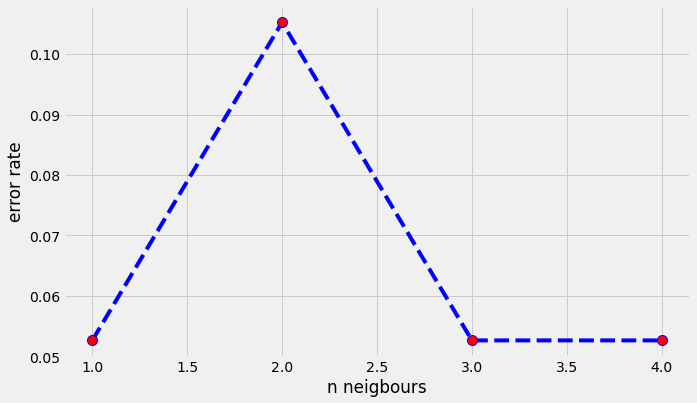

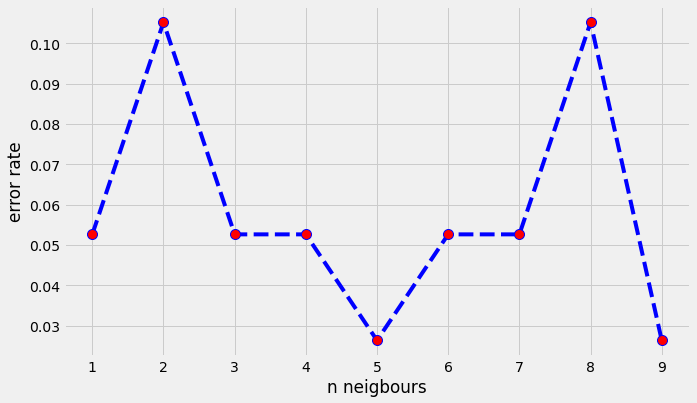

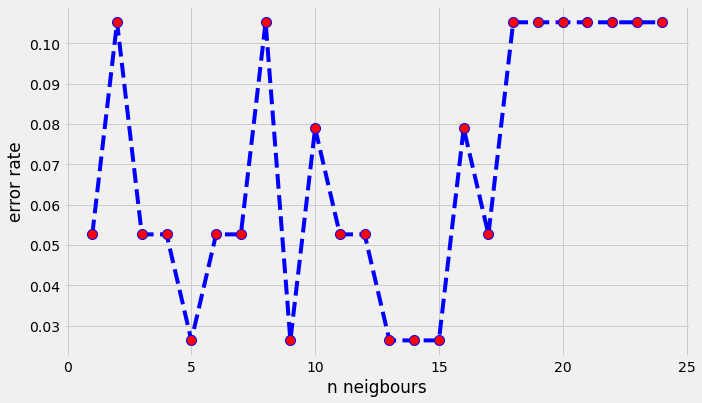

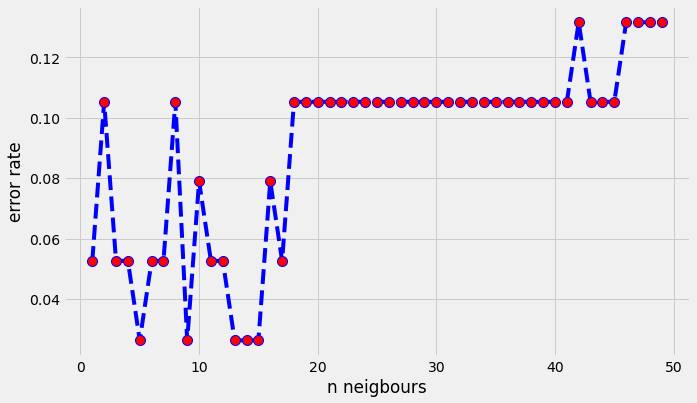

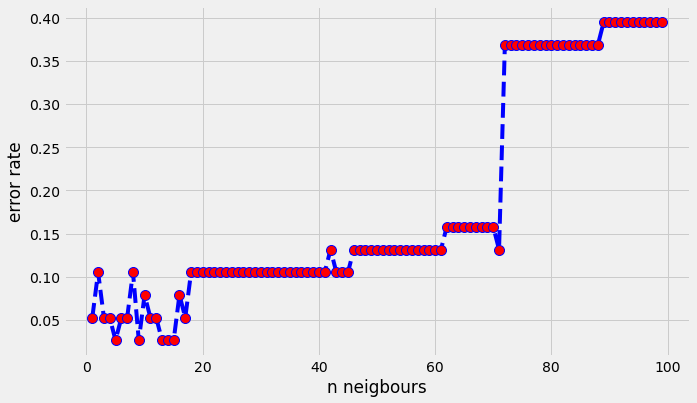

In [54]:
error(5)
error(10)
error(25)
error(50)
error(100)

In [2]:
import os
import cv2

In [4]:
images_path='C:\\Users\\josyu\\Downloads\\img_align_celeba\\img_align_celeba'

In [5]:
def processimage(path):
    print(path)
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    newimg = cv2.resize(gray, (0, 0), fx = 0.1, fy = 0.1)
    redimg=newimg.reshape(396,)
    return redimg

In [6]:
processimage(images_path+"/"+os.listdir(images_path)[0])

C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000001.jpg


array([233, 233, 233, 236, 236, 236, 237, 236, 240, 240, 127,  72,  27,
        60,  84, 118,  60, 236, 233, 233, 235, 237, 236, 236, 239, 238,
       239, 239,  36,  67,  17, 109,  79,  96,  94, 238, 237, 237, 235,
       237, 238, 236, 239, 239, 239, 237,  23,  46,  60, 120, 114, 108,
       141, 245, 238, 239, 239, 239, 239, 241, 239, 240, 130,  33, 103,
        38,  73,  94, 186, 133, 195, 242, 239, 240, 241, 241, 239, 241,
       240,  84, 152,  26,  15,  12, 152, 175, 157, 177, 139, 241, 240,
       239, 241, 241, 241, 240, 183, 174, 126,  50,  31,  51, 111, 157,
       179, 185, 116, 239, 239, 242, 240, 244, 229, 156,  17, 201, 175,
       157,  93,  87, 111, 149, 211, 197, 139,  94, 241, 241, 240, 195,
       126,  57, 155, 216, 223, 230, 228, 201, 120, 167, 181, 127, 174,
       105, 241, 241, 206, 114,  13,  37, 181, 224, 235, 246, 236, 215,
       190,  93, 163, 172, 132, 177, 243, 195, 179, 119,  12,  29, 196,
       222, 235, 245, 243, 230, 193,  67,  12, 191, 145, 164, 21

In [7]:
classa=[]
for i in range(0,100):
    temp=processimage(images_path+"/"+os.listdir(images_path)[i])
    classa.append(temp)

C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000001.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000002.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000003.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000004.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000005.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000006.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000007.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000008.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000009.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000010.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000011.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000012.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000013.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000014.jpg
C:\Users\josyu\Downl

In [10]:
classa=np.array(classa)
DATAa=pd.DataFrame(classa)

In [11]:
DATAa["Label"]=[0]*100

In [12]:
DATAa.head()

,0,1,2,3,4,5,6,7,8,9,...,387,388,389,390,391,392,393,394,395,Label
0,233,233,233,236,236,236,237,236,240,240,...,144,191,189,160,134,144,106,67,67,0
1,55,102,130,102,62,94,82,72,89,104,...,104,76,112,104,69,52,69,67,104,0
2,255,255,255,255,219,251,255,255,255,255,...,130,213,127,166,164,98,86,88,91,0
3,39,80,56,33,31,10,6,6,52,6,...,167,140,133,120,18,56,143,43,59,0
4,187,209,190,233,233,172,188,189,232,233,...,176,213,210,160,187,185,183,182,183,0


In [13]:
classb=[]
for i in range(100,200):
    temp=processimage(images_path+"/"+os.listdir(images_path)[i])
    classb.append(temp)

C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000101.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000102.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000103.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000104.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000105.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000106.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000107.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000108.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000109.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000110.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000111.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000112.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000113.jpg
C:\Users\josyu\Downloads\img_align_celeba\img_align_celeba/000114.jpg
C:\Users\josyu\Downl

In [94]:
classb=np.array(classb)
DATAb=pd.DataFrame(classb)

In [96]:
DATAb["Label"]=[1]*100

In [97]:
DATAb.head()

,0,1,2,3,4,5,6,7,8,9,...,387,388,389,390,391,392,393,394,395,Label
0,32,32,33,29,109,114,103,55,0,1,...,206,211,211,215,25,38,40,45,32,1
1,150,152,150,149,145,148,143,144,138,134,...,48,97,146,138,135,142,152,202,123,1
2,110,109,112,117,122,127,125,129,132,131,...,238,93,144,130,182,152,142,137,130,1
3,230,228,228,226,225,223,222,222,220,221,...,135,210,14,10,23,213,211,211,211,1
4,46,45,59,74,53,62,90,55,87,51,...,162,153,123,109,15,14,3,5,3,1


In [99]:
final_data=pd.concat([DATAa,DATAb])

In [101]:
final_data.shape

(200, 397)

In [103]:
x=final_data.drop("Label",axis=1)
y=final_data["Label"]

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scalar=StandardScaler()
x=scalar.fit_transform(x)

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [108]:
svm_model=SVC()
svm_model.fit(x_train,y_train)

SVC()

In [109]:
y_pred=svm_model.predict(x_test)
print("SVM Classifier")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy is : ",accuracy_score(y_test,y_pred))
print("cross validation accuracy ",end=" ")
print(cross_val_score(svm_model,x_train,y_train,cv=13).mean())

SVM Classifier
[[23  7]
 [14 16]]
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        30
           1       0.70      0.53      0.60        30

    accuracy                           0.65        60
   macro avg       0.66      0.65      0.65        60
weighted avg       0.66      0.65      0.65        60

Accuracy is :  0.65
cross validation accuracy  0.48741258741258736


In [110]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [111]:
print("KNN Classifier")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy is : ",accuracy_score(y_test,y_pred))
print("cross validation accuracy ",end=" ")
print(cross_val_score(svm_model,x_train,y_train,cv=13).mean())

KNN Classifier
[[16 14]
 [16 14]]
              precision    recall  f1-score   support

           0       0.50      0.53      0.52        30
           1       0.50      0.47      0.48        30

    accuracy                           0.50        60
   macro avg       0.50      0.50      0.50        60
weighted avg       0.50      0.50      0.50        60

Accuracy is :  0.5
cross validation accuracy  0.48741258741258736


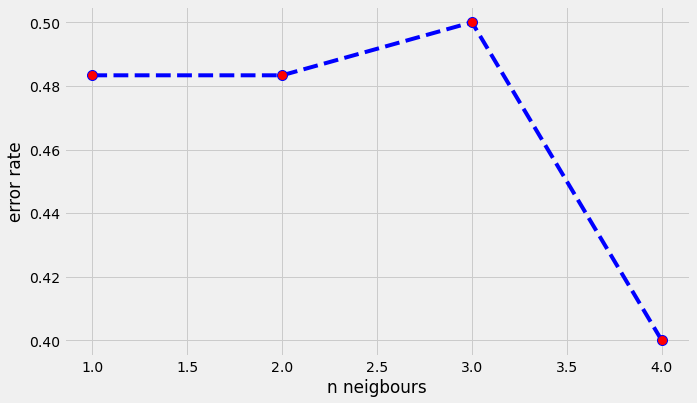

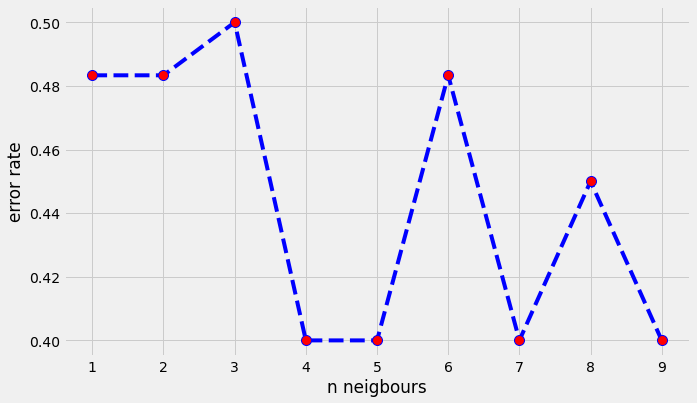

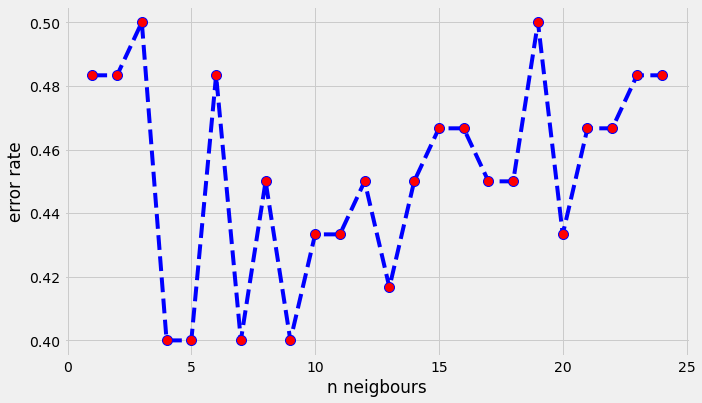

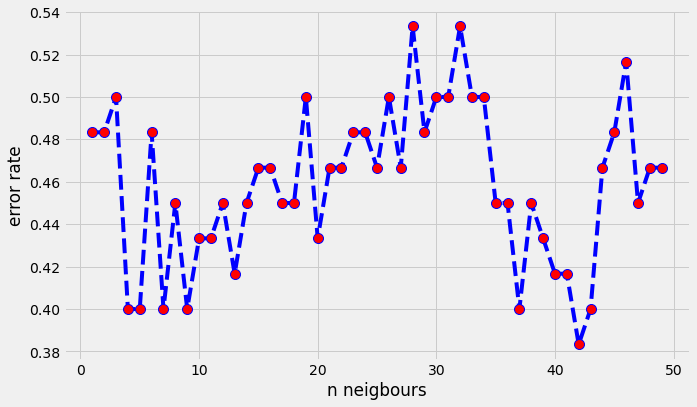

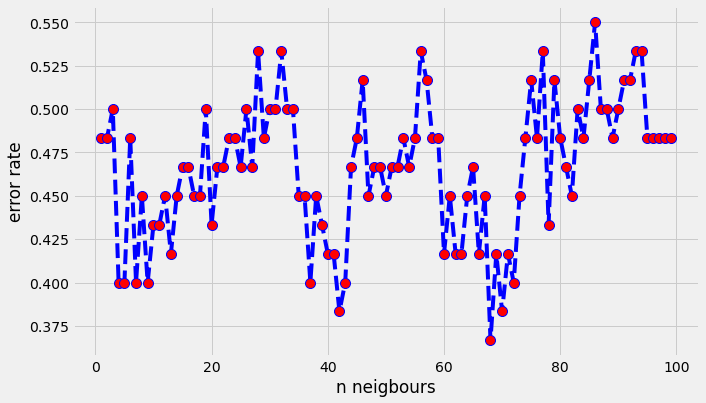

In [112]:
error(5)
error(10)
error(25)
error(50)
error(100)

In [116]:
knn=KNeighborsClassifier(n_neighbors=43)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("KNN Classifier")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy is : ",accuracy_score(y_test,y_pred))
print("cross validation accuracy ",end=" ")
print(cross_val_score(svm_model,x_train,y_train,cv=13).mean())

KNN Classifier
[[22  8]
 [16 14]]
              precision    recall  f1-score   support

           0       0.58      0.73      0.65        30
           1       0.64      0.47      0.54        30

    accuracy                           0.60        60
   macro avg       0.61      0.60      0.59        60
weighted avg       0.61      0.60      0.59        60

Accuracy is :  0.6
cross validation accuracy  0.48741258741258736
